In [1]:
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
from tqdm import tqdm
import math
import random
from torch.utils.data import Dataset, DataLoader
import cv2
import torchvision

In [2]:
from sklearn import preprocessing

In [1]:
'''from google.colab import drive
drive.mount('/content/drive')'''#For colab

"from google.colab import drive\ndrive.mount('/content/drive')"

In [ ]:
#unzipping file
#!unzip /content/drive/MyDrive/Shopee/train_images.zip -d /content/drive/MyDrive/Shopee/ #DONT REUSE

In [3]:
train_csv = pd.read_csv(r'train.csv')

In [4]:
train_csv.head()

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069


In [5]:
#img_temp = Image.open('/content/drive/MyDrive/Shopee/train_images/0000a68812bc7e98c42888dfb1c07da0.jpg')
img_temp = cv2.imread('train_images/00136d1cf4edede0203f32f05f660588.jpg')



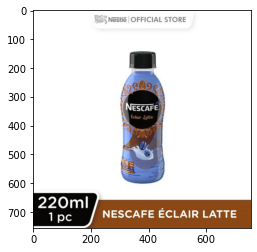

In [6]:
plt.imshow(img_temp)

In [7]:
# Labelencoder for labels
encoder = preprocessing.LabelEncoder()
train_csv['label_group']  = encoder.fit_transform(train_csv['label_group'])


In [8]:
train_csv.head()

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,666
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",7572
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,6172
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,10509
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,9425


In [10]:
# Number of labels
n_labels = max(train_csv["label_group"])+1
print(n_labels)

11014


In [15]:
# Createing dataset
class ShopeeDataset(Dataset):
    def __init__(self, csv, transforms=None, imsize = 512):
        self.csv = csv
        self.transforms = transforms
        self.imsize = imsize
    def __len__(self):
        return self.csv.shape[0]

    def __getitem__(self, index):
        row = self.csv.iloc[index]
        title = row.title
        img = cv2.imread('train_images/'+row.image)
        img= transforms.ToTensor()(img)
        if self.transforms != None:
          img = self.transforms(img)
        img = transforms.Resize((self.imsize,self.imsize))(img)
        #img = img.unsqueeze(dim = 0)
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        return img,torch.tensor(row.label_group)

In [16]:
ds = ShopeeDataset(train_csv, imsize= 24)

In [17]:
len(ds)

34250

In [18]:
ds[0][0].size()

torch.Size([3, 24, 24])

In [19]:
train_loader = torch.utils.data.DataLoader(
        ds,
        batch_size=120,
        pin_memory=True,
        drop_last=True
    )

torch.Size([120, 3, 24, 24])
tensor([  666,  7572,  6172, 10509,  9425,  6836,  4687,  3976,  6076,  6754,
         6347,  1306,  1306, 10797,  4940,   897,  4002,  6058,  8795,  5382,
         9363,  1363, 10874,  5732, 10391,  1039,  5192,  7555,  1366,  1366,
         2333,  6351, 10937,  9246, 10069,  4148,  6817,  8584,  9843,  2575,
         3012,   260,  2466,  2512,  2719,  5085,  3907,  9392,  3280,  4728,
         2994,  7285,   947,  3529,  5705,  7647,  3499,  3499,   561,   561,
         2119,  3128,   510,  9011,  3970,  9251,  4355,  2038,  5853,  9794,
          919,  9830,   383,  2922, 10577,  9011,  3203,  2569,  4839,  2072,
         6861,  8675, 10643,  2787,  9251,  2994,  3466,  4812,  8510,  6222,
         8036,  8720,  6951,  2102,  2930,  3096,  4472,  2994,  9011,  9011,
         7975,  3646, 10629,  4538,  2716,  2716,  2716,  2716,  8785,  8785,
          909,  9364,  5191,  4849,  3250,   316,  6806,  9518, 10730,   950])


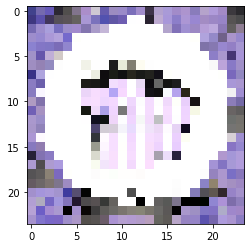

In [20]:
for x,y in train_loader:
  print(x.size())
  plt.imshow(transforms.ToPILImage()(x[0]))
  print(y)
  break

In [21]:
class RandNet(nn.Module):
    def __init__(self, n_classes, fc_dim = 24):
        super(RandNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 4, kernel_size = 3, padding = 1)
        self.maxpool = nn.MaxPool2d(2, stride = 2)
        self.layers = nn.Sequential(self.conv1, nn.ReLU(), self.maxpool)
        self.final_layer = nn.Linear(4*12*12, n_classes)
        
    def embedding(self, x):
        vector = self.layers(x)
        #vector = self.maxpool(vector)
        return (vector)
    
    def forward(self,x):
        z = self.embedding(x)
        z= z.view(-1,4*12*12)
        return self.final_layer(z)
        

In [22]:
rdn = RandNet(n_labels)

In [24]:
for x,y in train_loader:
  print(x.size())
  print(y)
  print(rdn(x))
  break

torch.Size([120, 3, 24, 24])
tensor([  666,  7572,  6172, 10509,  9425,  6836,  4687,  3976,  6076,  6754,
         6347,  1306,  1306, 10797,  4940,   897,  4002,  6058,  8795,  5382,
         9363,  1363, 10874,  5732, 10391,  1039,  5192,  7555,  1366,  1366,
         2333,  6351, 10937,  9246, 10069,  4148,  6817,  8584,  9843,  2575,
         3012,   260,  2466,  2512,  2719,  5085,  3907,  9392,  3280,  4728,
         2994,  7285,   947,  3529,  5705,  7647,  3499,  3499,   561,   561,
         2119,  3128,   510,  9011,  3970,  9251,  4355,  2038,  5853,  9794,
          919,  9830,   383,  2922, 10577,  9011,  3203,  2569,  4839,  2072,
         6861,  8675, 10643,  2787,  9251,  2994,  3466,  4812,  8510,  6222,
         8036,  8720,  6951,  2102,  2930,  3096,  4472,  2994,  9011,  9011,
         7975,  3646, 10629,  4538,  2716,  2716,  2716,  2716,  8785,  8785,
          909,  9364,  5191,  4849,  3250,   316,  6806,  9518, 10730,   950])
tensor([[-0.0887,  0.3042, -0.0519

In [25]:
class AverageMeter(object):
    def __init__(self):
        self.reset()
    
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0
    
    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

In [26]:
from time import time

In [29]:
#Training
def train_fn(dataloader, model, criterion, optimizer, epoch):
    model.train()
    loss_score = AverageMeter()
    t = time()
    tot = len(dataloader)
    #for i,d in tqdm(enumerate(dataloader), total=tot):
    i = 0
    for images,targets in tqdm(dataloader, total=tot):
        print("dataloading time")
        print(time()-t)
        batch_size = targets.shape[0]
        optimizer.zero_grad()
        output = model(images)
        print("forward time")
        print(time()-t)
        loss = criterion(output,targets)
        print("loss time")
        print(time()-t)
        loss.backward()
        optimizer.step()
        print("backpropagation time")
        print(time()-t)
        loss_score.update(loss.detach().item(), batch_size)
        #tk0.set_postfix(Train_Loss=loss_score.avg,Epoch=epoch,LR=optimizer.param_groups[0]['lr'])
     
        
    return loss_score

In [36]:
optimizer = torch.optim.Adam(rdn.parameters(), lr = 1e-3)
loss = nn.CrossEntropyLoss()
                             

In [40]:
train_fn(train_loader, rdn, loss, optimizer, 1)

  0%|          | 1/285 [00:01<09:07,  1.93s/it]

dataloading time
1.7618119716644287
forward time
1.8162710666656494
loss time
1.8196401596069336
backpropagation time
1.9311962127685547


  1%|          | 2/285 [00:03<07:04,  1.50s/it]

dataloading time
3.0319249629974365
forward time
3.0569679737091064
loss time
3.059641122817993
backpropagation time
3.1342861652374268


  1%|          | 3/285 [00:04<06:23,  1.36s/it]

dataloading time
4.222876787185669
forward time
4.246390104293823
loss time
4.249624967575073
backpropagation time
4.325287818908691


  1%|▏         | 4/285 [00:05<06:02,  1.29s/it]

dataloading time
5.412934064865112
forward time
5.435106992721558
loss time
5.437626123428345
backpropagation time
5.509393215179443


  2%|▏         | 5/285 [00:06<05:50,  1.25s/it]

dataloading time
6.590895175933838
forward time
6.613188982009888
loss time
6.615911960601807
backpropagation time
6.688277006149292


  2%|▏         | 6/285 [00:07<05:44,  1.23s/it]

dataloading time
7.7774498462677
forward time
7.800589084625244
loss time
7.802950143814087
backpropagation time
7.892496109008789


  2%|▏         | 7/285 [00:09<05:37,  1.21s/it]

dataloading time
8.951732873916626
forward time
8.977219104766846
loss time
8.979909181594849
backpropagation time
9.066997051239014


  3%|▎         | 8/285 [00:10<05:33,  1.20s/it]

dataloading time
10.148653984069824
forward time
10.171019077301025
loss time
10.173624038696289
backpropagation time
10.24661922454834


  3%|▎         | 9/285 [00:11<05:30,  1.20s/it]

dataloading time
11.323724031448364
forward time
11.348056077957153
loss time
11.350666046142578
backpropagation time
11.433321952819824


  4%|▎         | 10/285 [00:12<05:40,  1.24s/it]

dataloading time
12.643243074417114
forward time
12.666112899780273
loss time
12.669763088226318
backpropagation time
12.75562310218811


  4%|▍         | 11/285 [00:14<05:47,  1.27s/it]

dataloading time
13.982927083969116
forward time
14.006748914718628
loss time
14.00931191444397
backpropagation time
14.094082117080688


  4%|▍         | 12/285 [00:15<05:39,  1.24s/it]

dataloading time
15.178806066513062
forward time
15.2012300491333
loss time
15.203505039215088
backpropagation time
15.282320022583008


  5%|▍         | 13/285 [00:16<05:30,  1.22s/it]

dataloading time
16.32534408569336
forward time
16.35054898262024
loss time
16.35290217399597
backpropagation time
16.435467958450317


  5%|▍         | 14/285 [00:17<05:34,  1.23s/it]

dataloading time
17.61848020553589
forward time
17.640557050704956
loss time
17.643076181411743
backpropagation time
17.709145069122314


  5%|▌         | 15/285 [00:18<05:28,  1.22s/it]

dataloading time
18.786400079727173
forward time
18.809410095214844
loss time
18.811667919158936
backpropagation time
18.889846086502075


  6%|▌         | 16/285 [00:20<05:24,  1.20s/it]

dataloading time
19.968616008758545
forward time
19.99051809310913
loss time
19.993106842041016
backpropagation time
20.064305067062378


  6%|▌         | 17/285 [00:21<05:26,  1.22s/it]

dataloading time
21.21872901916504
forward time
21.240369081497192
loss time
21.24296498298645
backpropagation time
21.314791917800903


  6%|▋         | 18/285 [00:22<05:30,  1.24s/it]

dataloading time
22.510133028030396
forward time
22.532068014144897
loss time
22.534503936767578
backpropagation time
22.598222017288208


  7%|▋         | 19/285 [00:23<05:20,  1.21s/it]

dataloading time
23.624205112457275
forward time
23.646116018295288
loss time
23.648698091506958
backpropagation time
23.731082916259766


  7%|▋         | 20/285 [00:24<05:24,  1.23s/it]

dataloading time
24.896662950515747
forward time
24.918244123458862
loss time
24.920830965042114
backpropagation time
25.001158237457275


  7%|▋         | 21/285 [00:26<05:26,  1.24s/it]

dataloading time
26.15907311439514
forward time
26.183390855789185
loss time
26.18610715866089
backpropagation time
26.268481016159058


  8%|▊         | 22/285 [00:27<05:33,  1.27s/it]

dataloading time
27.50516104698181
forward time
27.52905797958374
loss time
27.53142285346985
backpropagation time
27.610263109207153


  8%|▊         | 23/285 [00:28<05:33,  1.27s/it]

dataloading time
28.778414011001587
forward time
28.80081605911255
loss time
28.80324411392212
backpropagation time
28.88816785812378


  8%|▊         | 24/285 [00:30<05:40,  1.31s/it]

dataloading time
30.103567123413086
forward time
30.13963794708252
loss time
30.142198085784912
backpropagation time
30.274970054626465


  9%|▉         | 25/285 [00:31<05:34,  1.29s/it]

dataloading time
31.36314606666565
forward time
31.3892560005188
loss time
31.391728162765503
backpropagation time
31.511169910430908


  9%|▉         | 26/285 [00:32<05:23,  1.25s/it]

dataloading time
32.5767080783844
forward time
32.59840798377991
loss time
32.601001024246216
backpropagation time
32.67764711380005


  9%|▉         | 27/285 [00:33<05:17,  1.23s/it]

dataloading time
33.75716185569763
forward time
33.77883219718933
loss time
33.781511068344116
backpropagation time
33.86635708808899


 10%|▉         | 28/285 [00:35<05:17,  1.23s/it]

dataloading time
35.00672197341919
forward time
35.02869391441345
loss time
35.031639099121094
backpropagation time
35.10541892051697


 10%|█         | 29/285 [00:36<05:10,  1.21s/it]

dataloading time
36.16128706932068
forward time
36.183354139328
loss time
36.18584489822388
backpropagation time
36.26524209976196


 11%|█         | 30/285 [00:37<05:24,  1.27s/it]

dataloading time
37.56887125968933
forward time
37.5936119556427
loss time
37.59612321853638
backpropagation time
37.68053698539734


 11%|█         | 31/285 [00:39<05:45,  1.36s/it]

dataloading time
39.13378095626831
forward time
39.16009497642517
loss time
39.163187980651855
backpropagation time
39.239869832992554


 11%|█         | 32/285 [00:40<05:32,  1.31s/it]

dataloading time
40.314433097839355
forward time
40.34894895553589
loss time
40.35264205932617
backpropagation time
40.447936058044434


 12%|█▏        | 33/285 [00:41<05:36,  1.34s/it]

dataloading time
41.72318625450134
forward time
41.75319290161133
loss time
41.75590109825134
backpropagation time
41.834840059280396


 12%|█▏        | 34/285 [00:43<05:57,  1.42s/it]

dataloading time
43.33982992172241
forward time
43.37022519111633
loss time
43.37336206436157
backpropagation time
43.46367311477661


 12%|█▏        | 35/285 [00:45<06:04,  1.46s/it]

dataloading time
44.873075008392334
forward time
44.90277910232544
loss time
44.90588998794556
backpropagation time
45.00620794296265


 13%|█▎        | 36/285 [00:46<06:10,  1.49s/it]

dataloading time
46.45474410057068
forward time
46.47743511199951
loss time
46.480080127716064
backpropagation time
46.56136703491211


 13%|█▎        | 37/285 [00:48<06:32,  1.58s/it]

dataloading time
48.243618965148926
forward time
48.269771099090576
loss time
48.27285408973694
backpropagation time
48.35922718048096


 13%|█▎        | 38/285 [00:49<06:03,  1.47s/it]

dataloading time
49.46992802619934
forward time
49.494109869003296
loss time
49.49697709083557
backpropagation time
49.57324504852295


 14%|█▎        | 39/285 [00:50<05:50,  1.42s/it]

dataloading time
50.77875804901123
forward time
50.80493402481079
loss time
50.80721712112427
backpropagation time
50.89014387130737


 14%|█▍        | 40/285 [00:52<05:38,  1.38s/it]

dataloading time
52.070889949798584
forward time
52.09538817405701
loss time
52.09838604927063
backpropagation time
52.17678999900818


 14%|█▍        | 41/285 [00:53<05:30,  1.35s/it]

dataloading time
53.34664797782898
forward time
53.3719642162323
loss time
53.37450385093689
backpropagation time
53.46190786361694


 15%|█▍        | 42/285 [00:54<05:25,  1.34s/it]

dataloading time
54.658761978149414
forward time
54.68348217010498
loss time
54.68609619140625
backpropagation time
54.769630908966064


 15%|█▌        | 43/285 [00:55<05:15,  1.31s/it]

dataloading time
55.89281702041626
forward time
55.91515111923218
loss time
55.9174120426178
backpropagation time
55.99309206008911


 15%|█▌        | 44/285 [00:57<05:05,  1.27s/it]

dataloading time
57.06893992424011
forward time
57.09509611129761
loss time
57.0977520942688
backpropagation time
57.17823624610901


 16%|█▌        | 45/285 [00:58<05:11,  1.30s/it]

dataloading time
58.385021924972534
forward time
58.40962886810303
loss time
58.41252088546753
backpropagation time
58.54892301559448


 16%|█▌        | 46/285 [01:00<05:25,  1.36s/it]

dataloading time
59.895283937454224
forward time
59.92491912841797
loss time
59.92790389060974
backpropagation time
60.051640033721924


 16%|█▋        | 47/285 [01:01<05:21,  1.35s/it]

dataloading time
61.263229846954346
forward time
61.28590416908264
loss time
61.28905916213989
backpropagation time
61.37289118766785


 17%|█▋        | 48/285 [01:02<05:24,  1.37s/it]

dataloading time
62.662168979644775
forward time
62.69358992576599
loss time
62.69611215591431
backpropagation time
62.78419613838196


 17%|█▋        | 49/285 [01:04<05:51,  1.49s/it]

dataloading time
64.42459201812744
forward time
64.45262098312378
loss time
64.45512700080872
backpropagation time
64.56385087966919


 18%|█▊        | 50/285 [01:05<05:45,  1.47s/it]

dataloading time
65.86958885192871
forward time
65.8914532661438
loss time
65.89374685287476
backpropagation time
65.9793860912323


 18%|█▊        | 51/285 [01:07<05:38,  1.45s/it]

dataloading time
67.26104021072388
forward time
67.28323197364807
loss time
67.28560304641724
backpropagation time
67.371835231781


 18%|█▊        | 52/285 [01:08<05:27,  1.40s/it]

dataloading time
68.57245111465454
forward time
68.59615993499756
loss time
68.59868907928467
backpropagation time
68.67718195915222


 19%|█▊        | 53/285 [01:10<05:29,  1.42s/it]

dataloading time
70.04422187805176
forward time
70.06644296646118
loss time
70.06905698776245
backpropagation time
70.14154601097107


 19%|█▉        | 54/285 [01:11<05:33,  1.44s/it]

dataloading time
71.51997590065002
forward time
71.54267907142639
loss time
71.5451021194458
backpropagation time
71.63034009933472


 19%|█▉        | 55/285 [01:13<05:43,  1.49s/it]

dataloading time
73.15096712112427
forward time
73.17318511009216
loss time
73.17571997642517
backpropagation time
73.24706721305847


 20%|█▉        | 56/285 [01:14<05:40,  1.49s/it]

dataloading time
74.60756611824036
forward time
74.63045191764832
loss time
74.6329619884491
backpropagation time
74.72060799598694


 20%|██        | 57/285 [01:16<05:41,  1.50s/it]

dataloading time
76.12979292869568
forward time
76.15251207351685
loss time
76.15531706809998
backpropagation time
76.24792289733887


 20%|██        | 58/285 [01:17<05:41,  1.50s/it]

dataloading time
77.66616225242615
forward time
77.68920302391052
loss time
77.69205093383789
backpropagation time
77.76042795181274


 21%|██        | 59/285 [01:19<05:24,  1.43s/it]

dataloading time
78.93397903442383
forward time
78.95674395561218
loss time
78.95970106124878
backpropagation time
79.0346109867096


 21%|██        | 60/285 [01:20<05:05,  1.36s/it]

dataloading time
80.10568499565125
forward time
80.12772297859192
loss time
80.13010311126709
backpropagation time
80.2054979801178


 21%|██▏       | 61/285 [01:21<04:51,  1.30s/it]

dataloading time
81.28216123580933
forward time
81.30463790893555
loss time
81.30702209472656
backpropagation time
81.38004302978516


 22%|██▏       | 62/285 [01:22<04:58,  1.34s/it]

dataloading time
82.69689393043518
forward time
82.7205319404602
loss time
82.72317004203796
backpropagation time
82.80356907844543


 22%|██▏       | 63/285 [01:24<04:58,  1.35s/it]

dataloading time
84.05245995521545
forward time
84.07703709602356
loss time
84.07964420318604
backpropagation time
84.16688513755798


 22%|██▏       | 64/285 [01:25<05:07,  1.39s/it]

dataloading time
85.55194115638733
forward time
85.57558083534241
loss time
85.5786349773407
backpropagation time
85.66625308990479


 23%|██▎       | 65/285 [01:27<05:08,  1.40s/it]

dataloading time
86.98139691352844
forward time
87.00571417808533
loss time
87.00827217102051
backpropagation time
87.09031200408936


 23%|██▎       | 66/285 [01:28<04:55,  1.35s/it]

dataloading time
88.21658396720886
forward time
88.23839092254639
loss time
88.2419900894165
backpropagation time
88.3229730129242


 24%|██▎       | 67/285 [01:29<04:55,  1.36s/it]

dataloading time
89.57967686653137
forward time
89.6045491695404
loss time
89.6072461605072
backpropagation time
89.69061803817749


 24%|██▍       | 68/285 [01:31<04:52,  1.35s/it]

dataloading time
90.91763615608215
forward time
90.94185495376587
loss time
90.9445731639862
backpropagation time
91.02756810188293


 24%|██▍       | 69/285 [01:32<04:44,  1.32s/it]

dataloading time
92.15849208831787
forward time
92.18121218681335
loss time
92.18383502960205
backpropagation time
92.26322984695435


 25%|██▍       | 70/285 [01:33<04:47,  1.34s/it]

dataloading time
93.54351997375488
forward time
93.5671911239624
loss time
93.5698390007019
backpropagation time
93.6474039554596


 25%|██▍       | 71/285 [01:34<04:41,  1.32s/it]

dataloading time
94.81126403808594
forward time
94.83753705024719
loss time
94.8432948589325
backpropagation time
94.91821694374084


 25%|██▌       | 72/285 [01:36<04:44,  1.34s/it]

dataloading time
96.16652011871338
forward time
96.18994498252869
loss time
96.19225120544434
backpropagation time
96.30495309829712


 26%|██▌       | 73/285 [01:37<04:48,  1.36s/it]

dataloading time
97.60140895843506
forward time
97.62673497200012
loss time
97.6290910243988
backpropagation time
97.7134141921997


 26%|██▌       | 74/285 [01:38<04:42,  1.34s/it]

dataloading time
98.8746931552887
forward time
98.90154385566711
loss time
98.90402722358704
backpropagation time
98.99858498573303


 26%|██▋       | 75/285 [01:40<04:41,  1.34s/it]

dataloading time
100.24399209022522
forward time
100.26534295082092
loss time
100.26773285865784
backpropagation time
100.35089826583862


 27%|██▋       | 76/285 [01:41<04:44,  1.36s/it]

dataloading time
101.65371894836426
forward time
101.677659034729
loss time
101.68031406402588
backpropagation time
101.75789308547974


 27%|██▋       | 77/285 [01:43<04:46,  1.38s/it]

dataloading time
103.05454802513123
forward time
103.07645416259766
loss time
103.07905602455139
backpropagation time
103.171541929245


 27%|██▋       | 78/285 [01:44<04:59,  1.45s/it]

dataloading time
104.67306017875671
forward time
104.69599413871765
loss time
104.69900798797607
backpropagation time
104.78853917121887


 28%|██▊       | 79/285 [01:46<04:52,  1.42s/it]

dataloading time
106.0467598438263
forward time
106.06977701187134
loss time
106.07248616218567
backpropagation time
106.14779496192932


 28%|██▊       | 80/285 [01:47<04:36,  1.35s/it]

dataloading time
107.22753882408142
forward time
107.24949097633362
loss time
107.25176692008972
backpropagation time
107.33238387107849


 28%|██▊       | 81/285 [01:48<04:36,  1.36s/it]

dataloading time
108.59482383728027
forward time
108.61730003356934
loss time
108.61970615386963
backpropagation time
108.7013680934906


 29%|██▉       | 82/285 [01:50<04:44,  1.40s/it]

dataloading time
110.08711290359497
forward time
110.11026620864868
loss time
110.11283707618713
backpropagation time
110.20354413986206


 29%|██▉       | 83/285 [01:51<04:51,  1.44s/it]

dataloading time
111.62470698356628
forward time
111.64827799797058
loss time
111.65134406089783
backpropagation time
111.74977207183838


 29%|██▉       | 84/285 [01:53<04:57,  1.48s/it]

dataloading time
113.19039988517761
forward time
113.21495509147644
loss time
113.21774101257324
backpropagation time
113.31258797645569


 30%|██▉       | 85/285 [01:54<04:55,  1.48s/it]

dataloading time
114.68329119682312
forward time
114.70517921447754
loss time
114.70773696899414
backpropagation time
114.78970789909363


 30%|███       | 86/285 [01:56<04:53,  1.48s/it]

dataloading time
116.12287712097168
forward time
116.14529395103455
loss time
116.14820599555969
backpropagation time
116.25625586509705


 31%|███       | 87/285 [01:57<04:57,  1.50s/it]

dataloading time
117.70610499382019
forward time
117.73134207725525
loss time
117.73395299911499
backpropagation time
117.82381415367126


 31%|███       | 88/285 [01:59<04:58,  1.52s/it]

dataloading time
119.26553916931152
forward time
119.28971099853516
loss time
119.29247307777405
backpropagation time
119.37540411949158


 31%|███       | 89/285 [02:00<04:47,  1.47s/it]

dataloading time
120.61804103851318
forward time
120.64019513130188
loss time
120.6431999206543
backpropagation time
120.73104882240295


 32%|███▏      | 90/285 [02:02<04:43,  1.45s/it]

dataloading time
122.04409909248352
forward time
122.06595706939697
loss time
122.06826496124268
backpropagation time
122.15268397331238


 32%|███▏      | 91/285 [02:03<04:44,  1.47s/it]

dataloading time
123.55341410636902
forward time
123.57543182373047
loss time
123.5779881477356
backpropagation time
123.65416216850281


 32%|███▏      | 92/285 [02:05<04:47,  1.49s/it]

dataloading time
125.08480715751648
forward time
125.10774898529053
loss time
125.11055517196655
backpropagation time
125.19608283042908


 33%|███▎      | 93/285 [02:06<04:50,  1.51s/it]

dataloading time
126.6422791481018
forward time
126.66574907302856
loss time
126.66861319541931
backpropagation time
126.7549340724945


 33%|███▎      | 94/285 [02:08<04:45,  1.50s/it]

dataloading time
128.11148524284363
forward time
128.1339991092682
loss time
128.1368010044098
backpropagation time
128.21252393722534


 33%|███▎      | 95/285 [02:09<04:44,  1.50s/it]

dataloading time
129.61028289794922
forward time
129.63258004188538
loss time
129.6350121498108
backpropagation time
129.71825003623962


 34%|███▎      | 96/285 [02:11<04:34,  1.45s/it]

dataloading time
130.95137405395508
forward time
130.97418308258057
loss time
130.97678518295288
backpropagation time
131.0584900379181


 34%|███▍      | 97/285 [02:12<04:26,  1.42s/it]

dataloading time
132.2881178855896
forward time
132.3124861717224
loss time
132.31506204605103
backpropagation time
132.39848494529724


 34%|███▍      | 98/285 [02:13<04:21,  1.40s/it]

dataloading time
133.65953826904297
forward time
133.68077421188354
loss time
133.6835639476776
backpropagation time
133.7570071220398


 35%|███▍      | 99/285 [02:14<04:11,  1.35s/it]

dataloading time
134.8724730014801
forward time
134.89607286453247
loss time
134.89870309829712
backpropagation time
134.99000215530396


 35%|███▌      | 100/285 [02:16<04:10,  1.35s/it]

dataloading time
136.23219299316406
forward time
136.25521516799927
loss time
136.25749492645264
backpropagation time
136.34718012809753


 35%|███▌      | 101/285 [02:17<04:18,  1.40s/it]

dataloading time
137.75981903076172
forward time
137.7834348678589
loss time
137.78575110435486
backpropagation time
137.87063002586365


 36%|███▌      | 102/285 [02:19<04:19,  1.42s/it]

dataloading time
139.1686818599701
forward time
139.21525025367737
loss time
139.2191150188446
backpropagation time
139.32362914085388


 36%|███▌      | 103/285 [02:20<04:21,  1.44s/it]

dataloading time
140.69448280334473
forward time
140.7204191684723
loss time
140.7228021621704
backpropagation time
140.8071391582489


 36%|███▋      | 104/285 [02:22<04:25,  1.46s/it]

dataloading time
142.2307209968567
forward time
142.25246787071228
loss time
142.25497603416443
backpropagation time
142.33519887924194


 37%|███▋      | 105/285 [02:23<04:22,  1.46s/it]

dataloading time
143.66045689582825
forward time
143.68312811851501
loss time
143.6856870651245
backpropagation time
143.7743320465088


 37%|███▋      | 106/285 [02:25<04:20,  1.46s/it]

dataloading time
145.13655495643616
forward time
145.1583170890808
loss time
145.16065096855164
backpropagation time
145.23327207565308


 38%|███▊      | 107/285 [02:26<04:18,  1.45s/it]

dataloading time
146.5775420665741
forward time
146.59979104995728
loss time
146.60218119621277
backpropagation time
146.67594599723816


 38%|███▊      | 108/285 [02:28<04:19,  1.47s/it]

dataloading time
148.0634250640869
forward time
148.08536386489868
loss time
148.08776712417603
backpropagation time
148.17021799087524


 38%|███▊      | 109/285 [02:29<04:21,  1.49s/it]

dataloading time
149.60136604309082
forward time
149.62371706962585
loss time
149.62641406059265
backpropagation time
149.712060213089


 39%|███▊      | 110/285 [02:31<04:18,  1.48s/it]

dataloading time
151.05760407447815
forward time
151.07940816879272
loss time
151.08215403556824
backpropagation time
151.1662290096283


 39%|███▉      | 111/285 [02:32<04:18,  1.49s/it]

dataloading time
152.57761096954346
forward time
152.59980416297913
loss time
152.60206699371338
backpropagation time
152.67210221290588


 39%|███▉      | 112/285 [02:33<04:07,  1.43s/it]

dataloading time
153.87435603141785
forward time
153.89564299583435
loss time
153.8983039855957
backpropagation time
153.9698531627655


 40%|███▉      | 113/285 [02:35<03:58,  1.39s/it]

dataloading time
155.1371660232544
forward time
155.1592879295349
loss time
155.1615490913391
backpropagation time
155.26474595069885


 40%|████      | 114/285 [02:36<03:46,  1.32s/it]

dataloading time
156.34158611297607
forward time
156.36327195167542
loss time
156.3658459186554
backpropagation time
156.43893909454346


 40%|████      | 115/285 [02:37<03:39,  1.29s/it]

dataloading time
157.55575108528137
forward time
157.57690691947937
loss time
157.5792989730835
backpropagation time
157.6522421836853


 41%|████      | 116/285 [02:38<03:39,  1.30s/it]

dataloading time
158.8595461845398
forward time
158.88134908676147
loss time
158.88355088233948
backpropagation time
158.96176886558533


 41%|████      | 117/285 [02:40<03:45,  1.34s/it]

dataloading time
160.30262303352356
forward time
160.3250548839569
loss time
160.3274118900299
backpropagation time
160.40830302238464


 41%|████▏     | 118/285 [02:41<03:37,  1.30s/it]

dataloading time
161.5148470401764
forward time
161.53614401817322
loss time
161.53871607780457
backpropagation time
161.60960602760315


 42%|████▏     | 119/285 [02:43<03:48,  1.38s/it]

dataloading time
163.0628321170807
forward time
163.08518815040588
loss time
163.0875780582428
backpropagation time
163.17283391952515


 42%|████▏     | 120/285 [02:44<03:50,  1.40s/it]

dataloading time
164.49429082870483
forward time
164.51891922950745
loss time
164.52126908302307
backpropagation time
164.61042094230652


 42%|████▏     | 121/285 [02:45<03:44,  1.37s/it]

dataloading time
165.81031703948975
forward time
165.8317391872406
loss time
165.8343448638916
backpropagation time
165.90792393684387


 43%|████▎     | 122/285 [02:47<03:40,  1.35s/it]

dataloading time
167.1039080619812
forward time
167.12683010101318
loss time
167.12930607795715
backpropagation time
167.226881980896


 43%|████▎     | 123/285 [02:48<03:40,  1.36s/it]

dataloading time
168.50517296791077
forward time
168.5271360874176
loss time
168.5296392440796
backpropagation time
168.6107940673828


 44%|████▎     | 124/285 [02:50<03:48,  1.42s/it]

dataloading time
170.05108404159546
forward time
170.072368144989
loss time
170.07470798492432
backpropagation time
170.15523982048035


 44%|████▍     | 125/285 [02:51<03:56,  1.48s/it]

dataloading time
171.6692819595337
forward time
171.7027781009674
loss time
171.70500206947327
backpropagation time
171.78720903396606


 44%|████▍     | 126/285 [02:53<03:45,  1.42s/it]

dataloading time
172.9478840827942
forward time
172.97445702552795
loss time
172.98028898239136
backpropagation time
173.05950784683228


 45%|████▍     | 127/285 [02:54<03:43,  1.42s/it]

dataloading time
174.36744809150696
forward time
174.39092803001404
loss time
174.39355421066284
backpropagation time
174.47410106658936


 45%|████▍     | 128/285 [02:55<03:44,  1.43s/it]

dataloading time
175.8045711517334
forward time
175.8289520740509
loss time
175.83186411857605
backpropagation time
175.92679715156555


 45%|████▌     | 129/285 [02:57<03:44,  1.44s/it]

dataloading time
177.28282594680786
forward time
177.3049440383911
loss time
177.3081419467926
backpropagation time
177.38679814338684


 46%|████▌     | 130/285 [02:58<03:42,  1.44s/it]

dataloading time
178.71596097946167
forward time
178.73766899108887
loss time
178.74040508270264
backpropagation time
178.82175302505493


 46%|████▌     | 131/285 [03:00<03:39,  1.42s/it]

dataloading time
180.1095118522644
forward time
180.13258695602417
loss time
180.13563895225525
backpropagation time
180.21820211410522


 46%|████▋     | 132/285 [03:01<03:33,  1.40s/it]

dataloading time
181.45163011550903
forward time
181.47391295433044
loss time
181.47633504867554
backpropagation time
181.55098009109497


 47%|████▋     | 133/285 [03:02<03:31,  1.39s/it]

dataloading time
182.82611513137817
forward time
182.85156202316284
loss time
182.8542079925537
backpropagation time
182.92575192451477


 47%|████▋     | 134/285 [03:04<03:36,  1.43s/it]

dataloading time
184.3412389755249
forward time
184.3641059398651
loss time
184.3666160106659
backpropagation time
184.45257711410522


 47%|████▋     | 135/285 [03:05<03:36,  1.44s/it]

dataloading time
185.8230881690979
forward time
185.84503388404846
loss time
185.8480350971222
backpropagation time
185.92827892303467


 48%|████▊     | 136/285 [03:07<03:35,  1.45s/it]

dataloading time
187.26937913894653
forward time
187.29109907150269
loss time
187.29333305358887
backpropagation time
187.37732815742493


 48%|████▊     | 137/285 [03:08<03:36,  1.46s/it]

dataloading time
188.77183318138123
forward time
188.79696893692017
loss time
188.79959917068481
backpropagation time
188.8781659603119


 48%|████▊     | 138/285 [03:10<03:40,  1.50s/it]

dataloading time
190.35981798171997
forward time
190.38253116607666
loss time
190.3852870464325
backpropagation time
190.4709391593933


 49%|████▉     | 139/285 [03:11<03:39,  1.51s/it]

dataloading time
191.87497210502625
forward time
191.89847111701965
loss time
191.9012279510498
backpropagation time
191.98957419395447


 49%|████▉     | 140/285 [03:13<03:32,  1.46s/it]

dataloading time
193.24583292007446
forward time
193.267422914505
loss time
193.26980090141296
backpropagation time
193.3500850200653


 49%|████▉     | 141/285 [03:14<03:30,  1.46s/it]

dataloading time
194.68360710144043
forward time
194.7066831588745
loss time
194.70924997329712
backpropagation time
194.8045620918274


 50%|████▉     | 142/285 [03:16<03:22,  1.42s/it]

dataloading time
196.01646399497986
forward time
196.03915810585022
loss time
196.0418050289154
backpropagation time
196.11858987808228


 50%|█████     | 143/285 [03:17<03:18,  1.40s/it]

dataloading time
197.37456607818604
forward time
197.39993000030518
loss time
197.4028480052948
backpropagation time
197.4848029613495


 51%|█████     | 144/285 [03:18<03:19,  1.42s/it]

dataloading time
198.8258638381958
forward time
198.84823489189148
loss time
198.85078501701355
backpropagation time
198.93244695663452


 51%|█████     | 145/285 [03:20<03:16,  1.41s/it]

dataloading time
200.21234393119812
forward time
200.23455095291138
loss time
200.23723316192627
backpropagation time
200.31855010986328


 51%|█████     | 146/285 [03:21<03:18,  1.43s/it]

dataloading time
201.69483590126038
forward time
201.7165229320526
loss time
201.71890091896057
backpropagation time
201.80179595947266


 52%|█████▏    | 147/285 [03:23<03:14,  1.41s/it]

dataloading time
203.0532500743866
forward time
203.07699918746948
loss time
203.07951521873474
backpropagation time
203.17153000831604


 52%|█████▏    | 148/285 [03:24<03:05,  1.36s/it]

dataloading time
204.30118918418884
forward time
204.32389903068542
loss time
204.32636404037476
backpropagation time
204.40295505523682


 52%|█████▏    | 149/285 [03:25<03:06,  1.37s/it]

dataloading time
205.69138407707214
forward time
205.71436595916748
loss time
205.7195692062378
backpropagation time
205.81594109535217


 53%|█████▎    | 150/285 [03:27<03:08,  1.40s/it]

dataloading time
207.14904022216797
forward time
207.1722400188446
loss time
207.17482590675354
backpropagation time
207.26070499420166


 53%|█████▎    | 151/285 [03:28<03:18,  1.48s/it]

dataloading time
208.82952284812927
forward time
208.8515751361847
loss time
208.8544659614563
backpropagation time
208.93535804748535


 53%|█████▎    | 152/285 [03:30<03:16,  1.48s/it]

dataloading time
210.30811500549316
forward time
210.329745054245
loss time
210.33215308189392
backpropagation time
210.41770792007446


 54%|█████▎    | 153/285 [03:31<03:15,  1.48s/it]

dataloading time
211.79601001739502
forward time
211.82021307945251
loss time
211.82288002967834
backpropagation time
211.90998101234436


 54%|█████▍    | 154/285 [03:33<03:15,  1.49s/it]

dataloading time
213.31641507148743
forward time
213.33950519561768
loss time
213.3420000076294
backpropagation time
213.42650604248047


 54%|█████▍    | 155/285 [03:34<03:14,  1.49s/it]

dataloading time
214.8163890838623
forward time
214.8379271030426
loss time
214.8403880596161
backpropagation time
214.91904091835022


 55%|█████▍    | 156/285 [03:36<03:02,  1.41s/it]

dataloading time
216.04059219360352
forward time
216.0625069141388
loss time
216.06490802764893
backpropagation time
216.1378779411316


 55%|█████▌    | 157/285 [03:37<02:55,  1.37s/it]

dataloading time
217.32741904258728
forward time
217.34946990013123
loss time
217.3518829345703
backpropagation time
217.4264760017395


 55%|█████▌    | 158/285 [03:38<02:49,  1.33s/it]

dataloading time
218.56231904029846
forward time
218.58365511894226
loss time
218.58623504638672
backpropagation time
218.6594421863556


 56%|█████▌    | 159/285 [03:39<02:46,  1.32s/it]

dataloading time
219.87031602859497
forward time
219.89205813407898
loss time
219.89465308189392
backpropagation time
219.96771097183228


 56%|█████▌    | 160/285 [03:41<02:47,  1.34s/it]

dataloading time
221.2399160861969
forward time
221.26182293891907
loss time
221.26484084129333
backpropagation time
221.35053515434265


 56%|█████▋    | 161/285 [03:42<02:55,  1.41s/it]

dataloading time
222.82040810585022
forward time
222.84449887275696
loss time
222.84687089920044
backpropagation time
222.9341402053833


 57%|█████▋    | 162/285 [03:44<02:54,  1.42s/it]

dataloading time
224.25827193260193
forward time
224.28408217430115
loss time
224.2866668701172
backpropagation time
224.37506413459778


 57%|█████▋    | 163/285 [03:45<02:53,  1.42s/it]

dataloading time
225.68626403808594
forward time
225.70868301391602
loss time
225.71168208122253
backpropagation time
225.7924609184265


 58%|█████▊    | 164/285 [03:47<02:57,  1.47s/it]

dataloading time
227.25925302505493
forward time
227.28114414215088
loss time
227.28357911109924
backpropagation time
227.3688681125641


 58%|█████▊    | 165/285 [03:48<02:53,  1.45s/it]

dataloading time
228.670086145401
forward time
228.6931300163269
loss time
228.69583797454834
backpropagation time
228.7770390510559


 58%|█████▊    | 166/285 [03:50<02:50,  1.43s/it]

dataloading time
230.07392501831055
forward time
230.09675908088684
loss time
230.0992341041565
backpropagation time
230.1713981628418


 59%|█████▊    | 167/285 [03:51<02:46,  1.41s/it]

dataloading time
231.40622401237488
forward time
231.4291410446167
loss time
231.43200206756592
backpropagation time
231.52055287361145


 59%|█████▉    | 168/285 [03:53<02:48,  1.44s/it]

dataloading time
232.92115187644958
forward time
232.94350695610046
loss time
232.94651222229004
backpropagation time
233.02688789367676


 59%|█████▉    | 169/285 [03:54<02:48,  1.46s/it]

dataloading time
234.4210832118988
forward time
234.4428300857544
loss time
234.44547700881958
backpropagation time
234.52514600753784


 60%|█████▉    | 170/285 [03:56<02:48,  1.47s/it]

dataloading time
235.90132403373718
forward time
235.92484712600708
loss time
235.92751002311707
backpropagation time
236.01214504241943


 60%|██████    | 171/285 [03:57<02:50,  1.50s/it]

dataloading time
237.47187495231628
forward time
237.49374103546143
loss time
237.49631786346436
backpropagation time
237.5850009918213


 60%|██████    | 172/285 [03:58<02:45,  1.46s/it]

dataloading time
238.86138892173767
forward time
238.88370609283447
loss time
238.8866491317749
backpropagation time
238.97020411491394


 61%|██████    | 173/285 [04:00<02:39,  1.42s/it]

dataloading time
240.17179584503174
forward time
240.1955211162567
loss time
240.19839715957642
backpropagation time
240.29277682304382


 61%|██████    | 174/285 [04:01<02:40,  1.44s/it]

dataloading time
241.67609214782715
forward time
241.69750714302063
loss time
241.6998851299286
backpropagation time
241.78414011001587


 61%|██████▏   | 175/285 [04:03<02:39,  1.45s/it]

dataloading time
243.13537502288818
forward time
243.1583731174469
loss time
243.16057801246643
backpropagation time
243.24531412124634


 62%|██████▏   | 176/285 [04:04<02:42,  1.49s/it]

dataloading time
244.7171220779419
forward time
244.74268889427185
loss time
244.74545812606812
backpropagation time
244.8341839313507


 62%|██████▏   | 177/285 [04:06<02:50,  1.58s/it]

dataloading time
246.50165390968323
forward time
246.52455186843872
loss time
246.52723908424377
backpropagation time
246.6273672580719


 62%|██████▏   | 178/285 [04:08<02:42,  1.52s/it]

dataloading time
247.90605401992798
forward time
247.92737293243408
loss time
247.9302041530609
backpropagation time
248.01062393188477


 63%|██████▎   | 179/285 [04:09<02:36,  1.48s/it]

dataloading time
249.29179000854492
forward time
249.31399297714233
loss time
249.31623816490173
backpropagation time
249.39637804031372


 63%|██████▎   | 180/285 [04:10<02:34,  1.47s/it]

dataloading time
250.7422580718994
forward time
250.76602602005005
loss time
250.76875114440918
backpropagation time
250.85645699501038


 64%|██████▎   | 181/285 [04:12<02:36,  1.51s/it]

dataloading time
252.329350233078
forward time
252.35372805595398
loss time
252.35630893707275
backpropagation time
252.44498205184937


 64%|██████▍   | 182/285 [04:13<02:33,  1.49s/it]

dataloading time
253.80046200752258
forward time
253.82203316688538
loss time
253.8248679637909
backpropagation time
253.90559196472168


 64%|██████▍   | 183/285 [04:15<02:35,  1.52s/it]

dataloading time
255.37347292900085
forward time
255.39908409118652
loss time
255.40193605422974
backpropagation time
255.49129390716553


 65%|██████▍   | 184/285 [04:17<02:35,  1.54s/it]

dataloading time
256.96574997901917
forward time
256.98753094673157
loss time
256.99022698402405
backpropagation time
257.0717120170593


 65%|██████▍   | 185/285 [04:18<02:31,  1.51s/it]

dataloading time
258.405198097229
forward time
258.4294378757477
loss time
258.43186616897583
backpropagation time
258.5179100036621


 65%|██████▌   | 186/285 [04:20<02:30,  1.52s/it]

dataloading time
259.93870401382446
forward time
259.9610528945923
loss time
259.96366000175476
backpropagation time
260.047003030777


 66%|██████▌   | 187/285 [04:21<02:30,  1.54s/it]

dataloading time
261.52179193496704
forward time
261.54385805130005
loss time
261.5465729236603
backpropagation time
261.63322591781616


 66%|██████▌   | 188/285 [04:23<02:28,  1.53s/it]

dataloading time
263.0434560775757
forward time
263.0658130645752
loss time
263.0681881904602
backpropagation time
263.1520450115204


 66%|██████▋   | 189/285 [04:24<02:28,  1.54s/it]

dataloading time
264.6205620765686
forward time
264.6427619457245
loss time
264.6451780796051
backpropagation time
264.726065158844


 67%|██████▋   | 190/285 [04:26<02:20,  1.48s/it]

dataloading time
265.96333408355713
forward time
265.9852259159088
loss time
265.98776507377625
backpropagation time
266.062735080719


 67%|██████▋   | 191/285 [04:27<02:19,  1.48s/it]

dataloading time
267.43261790275574
forward time
267.4554660320282
loss time
267.45789790153503
backpropagation time
267.54298400878906


 67%|██████▋   | 192/285 [04:29<02:19,  1.50s/it]

dataloading time
268.97461915016174
forward time
268.9970428943634
loss time
268.9995701313019
backpropagation time
269.08897614479065


 68%|██████▊   | 193/285 [04:30<02:15,  1.47s/it]

dataloading time
270.3739130496979
forward time
270.3992519378662
loss time
270.40160608291626
backpropagation time
270.48685908317566


 68%|██████▊   | 194/285 [04:31<02:13,  1.47s/it]

dataloading time
271.84441113471985
forward time
271.8662750720978
loss time
271.869215965271
backpropagation time
271.94960618019104


 68%|██████▊   | 195/285 [04:33<02:12,  1.48s/it]

dataloading time
273.3418529033661
forward time
273.3640398979187
loss time
273.366760969162
backpropagation time
273.44855284690857


 69%|██████▉   | 196/285 [04:34<02:11,  1.48s/it]

dataloading time
274.8362958431244
forward time
274.8592960834503
loss time
274.86183190345764
backpropagation time
274.9401409626007


 69%|██████▉   | 197/285 [04:36<02:09,  1.47s/it]

dataloading time
276.2861089706421
forward time
276.30804085731506
loss time
276.3105220794678
backpropagation time
276.3933370113373


 69%|██████▉   | 198/285 [04:37<02:10,  1.50s/it]

dataloading time
277.8302221298218
forward time
277.85300612449646
loss time
277.85570001602173
backpropagation time
277.94236302375793


 70%|██████▉   | 199/285 [04:39<02:09,  1.51s/it]

dataloading time
279.37118005752563
forward time
279.39268922805786
loss time
279.39511013031006
backpropagation time
279.4758651256561


 70%|███████   | 200/285 [04:40<02:01,  1.43s/it]

dataloading time
280.6328980922699
forward time
280.6553840637207
loss time
280.6586010456085
backpropagation time
280.7361431121826


 71%|███████   | 201/285 [04:42<02:02,  1.46s/it]

dataloading time
282.1533570289612
forward time
282.1761178970337
loss time
282.1785321235657
backpropagation time
282.2630751132965


 71%|███████   | 202/285 [04:43<02:00,  1.45s/it]

dataloading time
283.5844020843506
forward time
283.6075351238251
loss time
283.60996103286743
backpropagation time
283.69407200813293


 71%|███████   | 203/285 [04:45<02:10,  1.59s/it]

dataloading time
285.4783179759979
forward time
285.5040719509125
loss time
285.50704193115234
backpropagation time
285.59494805336


 72%|███████▏  | 204/285 [04:47<02:05,  1.55s/it]

dataloading time
286.94338607788086
forward time
286.9668290615082
loss time
286.96911001205444
backpropagation time
287.05851316452026


 72%|███████▏  | 205/285 [04:48<02:00,  1.50s/it]

dataloading time
288.33728885650635
forward time
288.3599019050598
loss time
288.3621151447296
backpropagation time
288.45357513427734


 72%|███████▏  | 206/285 [04:49<01:55,  1.46s/it]

dataloading time
289.64843010902405
forward time
289.6747980117798
loss time
289.6948699951172
backpropagation time
289.80999302864075


 73%|███████▎  | 207/285 [04:51<01:53,  1.46s/it]

dataloading time
291.15779089927673
forward time
291.18394017219543
loss time
291.1867880821228
backpropagation time
291.27305912971497


 73%|███████▎  | 208/285 [04:52<01:50,  1.44s/it]

dataloading time
292.5545380115509
forward time
292.5772650241852
loss time
292.579687833786
backpropagation time
292.6677780151367


 73%|███████▎  | 209/285 [04:53<01:47,  1.41s/it]

dataloading time
293.898894071579
forward time
293.92089915275574
loss time
293.9235670566559
backpropagation time
294.0004651546478


 74%|███████▎  | 210/285 [04:55<01:43,  1.39s/it]

dataloading time
295.2242531776428
forward time
295.2472651004791
loss time
295.2506160736084
backpropagation time
295.33273100852966


 74%|███████▍  | 211/285 [04:56<01:45,  1.42s/it]

dataloading time
296.7273688316345
forward time
296.75007009506226
loss time
296.7527379989624
backpropagation time
296.83378410339355


 74%|███████▍  | 212/285 [04:58<01:43,  1.42s/it]

dataloading time
298.1290340423584
forward time
298.15351700782776
loss time
298.1561999320984
backpropagation time
298.2424490451813


 75%|███████▍  | 213/285 [04:59<01:45,  1.46s/it]

dataloading time
299.65565299987793
forward time
299.684289932251
loss time
299.6878571510315
backpropagation time
299.800017118454


 75%|███████▌  | 214/285 [05:01<01:42,  1.44s/it]

dataloading time
301.0577700138092
forward time
301.0850169658661
loss time
301.08817887306213
backpropagation time
301.2032072544098


 75%|███████▌  | 215/285 [05:02<01:35,  1.37s/it]

dataloading time
302.30413699150085
forward time
302.3264071941376
loss time
302.3287720680237
backpropagation time
302.4069199562073


 76%|███████▌  | 216/285 [05:03<01:35,  1.39s/it]

dataloading time
303.7303340435028
forward time
303.7527039051056
loss time
303.75553822517395
backpropagation time
303.8318839073181


 76%|███████▌  | 217/285 [05:05<01:31,  1.34s/it]

dataloading time
304.9719579219818
forward time
304.9949429035187
loss time
304.99761605262756
backpropagation time
305.0782380104065


 76%|███████▋  | 218/285 [05:06<01:27,  1.31s/it]

dataloading time
306.21444392204285
forward time
306.2361168861389
loss time
306.23842096328735
backpropagation time
306.3152759075165


 77%|███████▋  | 219/285 [05:07<01:24,  1.28s/it]

dataloading time
307.40325713157654
forward time
307.425409078598
loss time
307.4277319908142
backpropagation time
307.50692915916443


 77%|███████▋  | 220/285 [05:08<01:21,  1.25s/it]

dataloading time
308.5811891555786
forward time
308.60351610183716
loss time
308.60592007637024
backpropagation time
308.6831910610199


 78%|███████▊  | 221/285 [05:09<01:19,  1.23s/it]

dataloading time
309.7883310317993
forward time
309.810781955719
loss time
309.81294894218445
backpropagation time
309.89054894447327


 78%|███████▊  | 222/285 [05:11<01:18,  1.24s/it]

dataloading time
311.02159214019775
forward time
311.0540699958801
loss time
311.05726623535156
backpropagation time
311.13695311546326


 78%|███████▊  | 223/285 [05:12<01:19,  1.28s/it]

dataloading time
312.4216351509094
forward time
312.4445650577545
loss time
312.4469380378723
backpropagation time
312.51979422569275


 79%|███████▊  | 224/285 [05:13<01:20,  1.32s/it]

dataloading time
313.80576610565186
forward time
313.829959154129
loss time
313.8324429988861
backpropagation time
313.9178800582886


 79%|███████▉  | 225/285 [05:15<01:20,  1.35s/it]

dataloading time
315.22455406188965
forward time
315.2466731071472
loss time
315.2491681575775
backpropagation time
315.3322129249573


 79%|███████▉  | 226/285 [05:16<01:22,  1.40s/it]

dataloading time
316.7437901496887
forward time
316.766300201416
loss time
316.76937103271484
backpropagation time
316.85276317596436


 80%|███████▉  | 227/285 [05:18<01:20,  1.40s/it]

dataloading time
318.1332530975342
forward time
318.1555850505829
loss time
318.15814185142517
backpropagation time
318.24198818206787


 80%|████████  | 228/285 [05:19<01:23,  1.47s/it]

dataloading time
319.7550621032715
forward time
319.7791030406952
loss time
319.78164196014404
backpropagation time
319.87013602256775


 80%|████████  | 229/285 [05:21<01:21,  1.46s/it]

dataloading time
321.2163691520691
forward time
321.238942861557
loss time
321.2413098812103
backpropagation time
321.3166410923004


 81%|████████  | 230/285 [05:22<01:19,  1.45s/it]

dataloading time
322.5975852012634
forward time
322.6255180835724
loss time
322.6283628940582
backpropagation time
322.736004114151


 81%|████████  | 231/285 [05:24<01:15,  1.40s/it]

dataloading time
323.9301459789276
forward time
323.95322489738464
loss time
323.9556269645691
backpropagation time
324.03957295417786


 81%|████████▏ | 232/285 [05:25<01:12,  1.36s/it]

dataloading time
325.18923592567444
forward time
325.21158814430237
loss time
325.21420097351074
backpropagation time
325.29688906669617


 82%|████████▏ | 233/285 [05:26<01:12,  1.40s/it]

dataloading time
326.68542194366455
forward time
326.70674300193787
loss time
326.7093029022217
backpropagation time
326.78144001960754


 82%|████████▏ | 234/285 [05:28<01:11,  1.41s/it]

dataloading time
328.1001148223877
forward time
328.12229800224304
loss time
328.12441205978394
backpropagation time
328.20546197891235


 82%|████████▏ | 235/285 [05:29<01:09,  1.40s/it]

dataloading time
329.4698312282562
forward time
329.4920189380646
loss time
329.4949290752411
backpropagation time
329.5852220058441


 83%|████████▎ | 236/285 [05:30<01:07,  1.37s/it]

dataloading time
330.7767810821533
forward time
330.7992150783539
loss time
330.8015170097351
backpropagation time
330.88327407836914


 83%|████████▎ | 237/285 [05:32<01:06,  1.39s/it]

dataloading time
332.2167239189148
forward time
332.2394230365753
loss time
332.2420611381531
backpropagation time
332.323557138443


 84%|████████▎ | 238/285 [05:33<01:06,  1.41s/it]

dataloading time
333.6774089336395
forward time
333.69873809814453
loss time
333.70113825798035
backpropagation time
333.772164106369


 84%|████████▍ | 239/285 [05:35<01:02,  1.36s/it]

dataloading time
334.90188217163086
forward time
334.92590618133545
loss time
334.92844414711
backpropagation time
335.0097568035126


 84%|████████▍ | 240/285 [05:36<01:01,  1.36s/it]

dataloading time
336.2702798843384
forward time
336.29301404953003
loss time
336.29573798179626
backpropagation time
336.3694908618927


 85%|████████▍ | 241/285 [05:37<00:59,  1.36s/it]

dataloading time
337.6165430545807
forward time
337.6391248703003
loss time
337.6417808532715
backpropagation time
337.73158502578735


 85%|████████▍ | 242/285 [05:39<01:00,  1.40s/it]

dataloading time
339.1214590072632
forward time
339.1439940929413
loss time
339.14660000801086
backpropagation time
339.2303740978241


 85%|████████▌ | 243/285 [05:40<00:59,  1.41s/it]

dataloading time
340.5550158023834
forward time
340.57740807533264
loss time
340.5800828933716
backpropagation time
340.66383695602417


 86%|████████▌ | 244/285 [05:42<00:57,  1.41s/it]

dataloading time
341.9439809322357
forward time
341.9661500453949
loss time
341.9688889980316
backpropagation time
342.06140995025635


 86%|████████▌ | 245/285 [05:43<00:57,  1.44s/it]

dataloading time
343.4805340766907
forward time
343.5030400753021
loss time
343.5056049823761
backpropagation time
343.5944609642029


 86%|████████▋ | 246/285 [05:45<00:55,  1.44s/it]

dataloading time
344.9036509990692
forward time
344.92584896087646
loss time
344.9285161495209
backpropagation time
345.0082402229309


 87%|████████▋ | 247/285 [05:46<00:56,  1.48s/it]

dataloading time
346.47193813323975
forward time
346.4958770275116
loss time
346.4982981681824
backpropagation time
346.5857288837433


 87%|████████▋ | 248/285 [05:48<00:54,  1.47s/it]

dataloading time
347.94131207466125
forward time
347.96395802497864
loss time
347.96668696403503
backpropagation time
348.05138993263245


 87%|████████▋ | 249/285 [05:49<00:52,  1.46s/it]

dataloading time
349.3663160800934
forward time
349.38959884643555
loss time
349.3919081687927
backpropagation time
349.47357511520386


 88%|████████▊ | 250/285 [05:50<00:49,  1.42s/it]

dataloading time
350.70338892936707
forward time
350.72535490989685
loss time
350.7277281284332
backpropagation time
350.8032910823822


 88%|████████▊ | 251/285 [05:52<00:49,  1.45s/it]

dataloading time
352.21945810317993
forward time
352.245600938797
loss time
352.24845004081726
backpropagation time
352.3357059955597


 88%|████████▊ | 252/285 [05:53<00:49,  1.50s/it]

dataloading time
353.8440010547638
forward time
353.8671758174896
loss time
353.86972212791443
backpropagation time
353.9538109302521


 89%|████████▉ | 253/285 [05:55<00:47,  1.49s/it]

dataloading time
355.2927050590515
forward time
355.3149890899658
loss time
355.3178770542145
backpropagation time
355.39966201782227


 89%|████████▉ | 254/285 [05:56<00:46,  1.50s/it]

dataloading time
356.8324611186981
forward time
356.8551721572876
loss time
356.85772013664246
backpropagation time
356.9483211040497


 89%|████████▉ | 255/285 [05:58<00:44,  1.50s/it]

dataloading time
358.31822419166565
forward time
358.34076595306396
loss time
358.34355187416077
backpropagation time
358.43674492836


 90%|████████▉ | 256/285 [05:59<00:43,  1.49s/it]

dataloading time
359.7933540344238
forward time
359.81675004959106
loss time
359.8195719718933
backpropagation time
359.9151909351349


 90%|█████████ | 257/285 [06:01<00:40,  1.46s/it]

dataloading time
361.19881105422974
forward time
361.220694065094
loss time
361.2236750125885
backpropagation time
361.30175518989563


 91%|█████████ | 258/285 [06:03<00:42,  1.58s/it]

dataloading time
363.0456931591034
forward time
363.0689799785614
loss time
363.07159399986267
backpropagation time
363.1458549499512


 91%|█████████ | 259/285 [06:04<00:37,  1.43s/it]

dataloading time
364.1303400993347
forward time
364.15233397483826
loss time
364.1553809642792
backpropagation time
364.23030710220337


 91%|█████████ | 260/285 [06:05<00:33,  1.36s/it]

dataloading time
365.3161678314209
forward time
365.3383421897888
loss time
365.34098291397095
backpropagation time
365.4142210483551


 92%|█████████▏| 261/285 [06:06<00:30,  1.27s/it]

dataloading time
366.40577721595764
forward time
366.42695808410645
loss time
366.4293110370636
backpropagation time
366.501580953598


 92%|█████████▏| 262/285 [06:07<00:28,  1.25s/it]

dataloading time
367.6016881465912
forward time
367.6232750415802
loss time
367.62588906288147
backpropagation time
367.69630217552185


 92%|█████████▏| 263/285 [06:08<00:27,  1.25s/it]

dataloading time
368.8533182144165
forward time
368.8741750717163
loss time
368.876503944397
backpropagation time
368.9492311477661


 93%|█████████▎| 264/285 [06:10<00:25,  1.23s/it]

dataloading time
370.013543844223
forward time
370.0380148887634
loss time
370.0406060218811
backpropagation time
370.11399126052856


 93%|█████████▎| 265/285 [06:11<00:24,  1.20s/it]

dataloading time
371.169447183609
forward time
371.19133591651917
loss time
371.1939902305603
backpropagation time
371.27000403404236


 93%|█████████▎| 266/285 [06:12<00:22,  1.20s/it]

dataloading time
372.35411500930786
forward time
372.37619614601135
loss time
372.3789381980896
backpropagation time
372.4600570201874


 94%|█████████▎| 267/285 [06:13<00:21,  1.19s/it]

dataloading time
373.5185971260071
forward time
373.54110407829285
loss time
373.5436680316925
backpropagation time
373.62247705459595


 94%|█████████▍| 268/285 [06:14<00:20,  1.18s/it]

dataloading time
374.67535614967346
forward time
374.6982262134552
loss time
374.7008719444275
backpropagation time
374.77424788475037


 94%|█████████▍| 269/285 [06:15<00:18,  1.18s/it]

dataloading time
375.87713718414307
forward time
375.8998341560364
loss time
375.9026720523834
backpropagation time
375.97495102882385


 95%|█████████▍| 270/285 [06:17<00:17,  1.17s/it]

dataloading time
377.01848912239075
forward time
377.04037714004517
loss time
377.0428400039673
backpropagation time
377.11487197875977


 95%|█████████▌| 271/285 [06:18<00:16,  1.16s/it]

dataloading time
378.1431519985199
forward time
378.16501808166504
loss time
378.1678378582001
backpropagation time
378.2395188808441


 95%|█████████▌| 272/285 [06:19<00:15,  1.16s/it]

dataloading time
379.301470041275
forward time
379.32339811325073
loss time
379.3259959220886
backpropagation time
379.39828515052795


 96%|█████████▌| 273/285 [06:20<00:13,  1.16s/it]

dataloading time
380.4782772064209
forward time
380.50027799606323
loss time
380.5028359889984
backpropagation time
380.5768840312958


 96%|█████████▌| 274/285 [06:21<00:12,  1.17s/it]

dataloading time
381.6758770942688
forward time
381.6978690624237
loss time
381.70055198669434
backpropagation time
381.77341508865356


 96%|█████████▋| 275/285 [06:22<00:11,  1.16s/it]

dataloading time
382.79510593414307
forward time
382.8170471191406
loss time
382.8197281360626
backpropagation time
382.8929240703583


 97%|█████████▋| 276/285 [06:24<00:10,  1.17s/it]

dataloading time
384.00845098495483
forward time
384.03009510040283
loss time
384.0329620838165
backpropagation time
384.1039412021637


 97%|█████████▋| 277/285 [06:25<00:09,  1.21s/it]

dataloading time
385.31337690353394
forward time
385.3355829715729
loss time
385.33855295181274
backpropagation time
385.40589213371277


 98%|█████████▊| 278/285 [06:26<00:08,  1.20s/it]

dataloading time
386.4640600681305
forward time
386.48578000068665
loss time
386.4882538318634
backpropagation time
386.56157422065735


 98%|█████████▊| 279/285 [06:27<00:07,  1.19s/it]

dataloading time
387.6410071849823
forward time
387.66316318511963
loss time
387.6659231185913
backpropagation time
387.73968410491943


 98%|█████████▊| 280/285 [06:28<00:05,  1.17s/it]

dataloading time
388.76819705963135
forward time
388.79022693634033
loss time
388.7929561138153
backpropagation time
388.86915612220764


 99%|█████████▊| 281/285 [06:30<00:04,  1.17s/it]

dataloading time
389.9418339729309
forward time
389.96354508399963
loss time
389.9660949707031
backpropagation time
390.0382080078125


 99%|█████████▉| 282/285 [06:31<00:03,  1.19s/it]

dataloading time
391.1705710887909
forward time
391.192241191864
loss time
391.1945888996124
backpropagation time
391.26798605918884


 99%|█████████▉| 283/285 [06:32<00:02,  1.19s/it]

dataloading time
392.3455741405487
forward time
392.3676800727844
loss time
392.3702709674835
backpropagation time
392.445298910141


100%|█████████▉| 284/285 [06:33<00:01,  1.21s/it]

dataloading time
393.59150195121765
forward time
393.6146650314331
loss time
393.61737608909607
backpropagation time
393.70840406417847


100%|██████████| 285/285 [06:34<00:00,  1.39s/it]

dataloading time
394.8576922416687
forward time
394.8804221153259
loss time
394.8827431201935
backpropagation time
394.9568829536438


**TO DO :**
- Data augmentation
- Arcface metric implementation
- CV and evaluation
- Transfer training using some model like effnet
- Modify code to use cuda



**Notes** 

The goal of the loss function is to minimize the maximum intra-class distance while keeping the features of different classes separable. Chosing the right loss function that can enhance the discrimnative power is key to our problem.